<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/feni_flood_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [707]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [708]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [709]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/flood_10000.csv")

In [710]:
df.shape

(10000, 15)

In [711]:
df.head()

,CID,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,twi_1,flood,POINT_X,POINT_Y
0,0,20.0,165.143768,2.0,1.0,1.0,0.000000,NaN,0.617557,373.0,120.000000,3829.208740,0.0,348783.2641,2554104.709
1,0,12.0,215.782578,1.0,64.0,0.0,2.992548,NaN,0.504781,374.5,1015.135437,669.794556,0.0,332135.8202,2546621.232
2,0,9.0,205.867493,3.0,64.0,0.0,2.043290,NaN,0.677900,373.5,1247.798096,98.035217,0.0,339325.1879,2548994.241
3,0,9.0,246.633606,3.0,64.0,2.0,0.350566,5.789567,0.639344,377.5,1056.834839,893.504334,1.0,321569.2133,2533110.970
4,0,10.0,194.800140,2.0,8.0,1.0,1.108461,3.945127,0.362405,374.5,1344.656128,0.000000,0.0,326521.7633,2537276.176


In [712]:
df = df.rename(columns={'twi_1': 'drainage_den'})

In [713]:
df['twi']=df['twi'].fillna(0)
df['river_dist']=df['river_dist'].fillna(df['river_dist'].mean)
df['elevation']=df['elevation'].fillna(df['elevation'].mean)
df['precipitation']=df['precipitation'].fillna(df['precipitation'].mean)
df['lulc']=df['lulc'].fillna(1)
df['flow_dir']=df['flow_dir'].fillna(2)
df['slope']=df['slope'].fillna(df['slope'].mean)
df['flow_accu']=df['flow_accu'].fillna(df['flow_accu'].mean)
df['ndvi']=df['ndvi'].fillna(df['ndvi'].mean)
df['drainage_den']=df['drainage_den'].fillna(df['drainage_den'].mean)
df['flood']=df['flood'].fillna(0)

In [714]:
df.isnull().sum()

,0
CID,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            10000 non-null  int64  
 1   elevation      10000 non-null  object 
 2   precipitation  10000 non-null  object 
 3   lulc           10000 non-null  float64
 4   flow_dir       10000 non-null  float64
 5   flow_accu      10000 non-null  object 
 6   slope          10000 non-null  object 
 7   twi            10000 non-null  float64
 8   ndvi           10000 non-null  object 
 9   permeability   10000 non-null  float64
 10  river_dist     10000 non-null  object 
 11  drainage_den   10000 non-null  object 
 12  flood          10000 non-null  float64
 13  POINT_X        10000 non-null  float64
 14  POINT_Y        10000 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


In [716]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.dtypes)

Index(['elevation', 'precipitation', 'flow_accu', 'slope', 'ndvi',
       'river_dist', 'drainage_den'],
      dtype='object')
CID                int64
elevation        float64
precipitation    float64
lulc             float64
flow_dir         float64
flow_accu        float64
slope            float64
twi              float64
ndvi             float64
permeability     float64
river_dist       float64
drainage_den     float64
flood            float64
POINT_X          float64
POINT_Y          float64
dtype: object


In [717]:
df.drop(columns=["CID", "POINT_X", "POINT_Y"], inplace=True)

In [718]:
df.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,20.0,165.143768,2.0,1.0,1.0,0.000000,0.000000,0.617557,373.0,120.000000,3829.208740,0.0
1,12.0,215.782578,1.0,64.0,0.0,2.992548,0.000000,0.504781,374.5,1015.135437,669.794556,0.0
2,9.0,205.867493,3.0,64.0,0.0,2.043290,0.000000,0.677900,373.5,1247.798096,98.035217,0.0
3,9.0,246.633606,3.0,64.0,2.0,0.350566,5.789567,0.639344,377.5,1056.834839,893.504334,1.0
4,10.0,194.800140,2.0,8.0,1.0,1.108461,3.945127,0.362405,374.5,1344.656128,0.000000,0.0


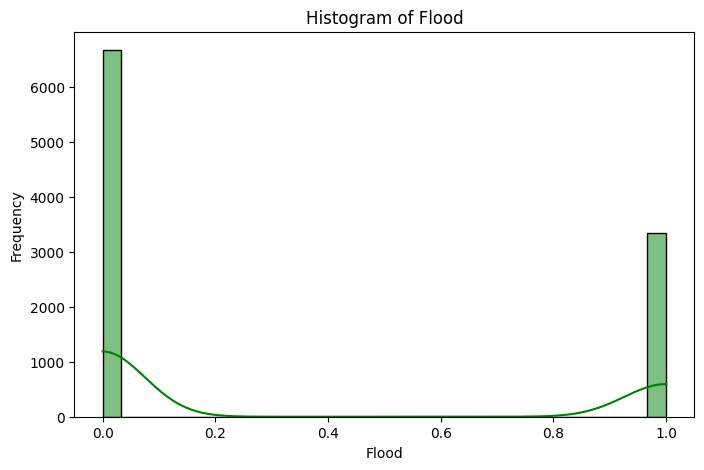

In [719]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flood'], bins=30, kde=True, color='green')
plt.xlabel("Flood")
plt.ylabel("Frequency")
plt.title("Histogram of Flood")
plt.show()

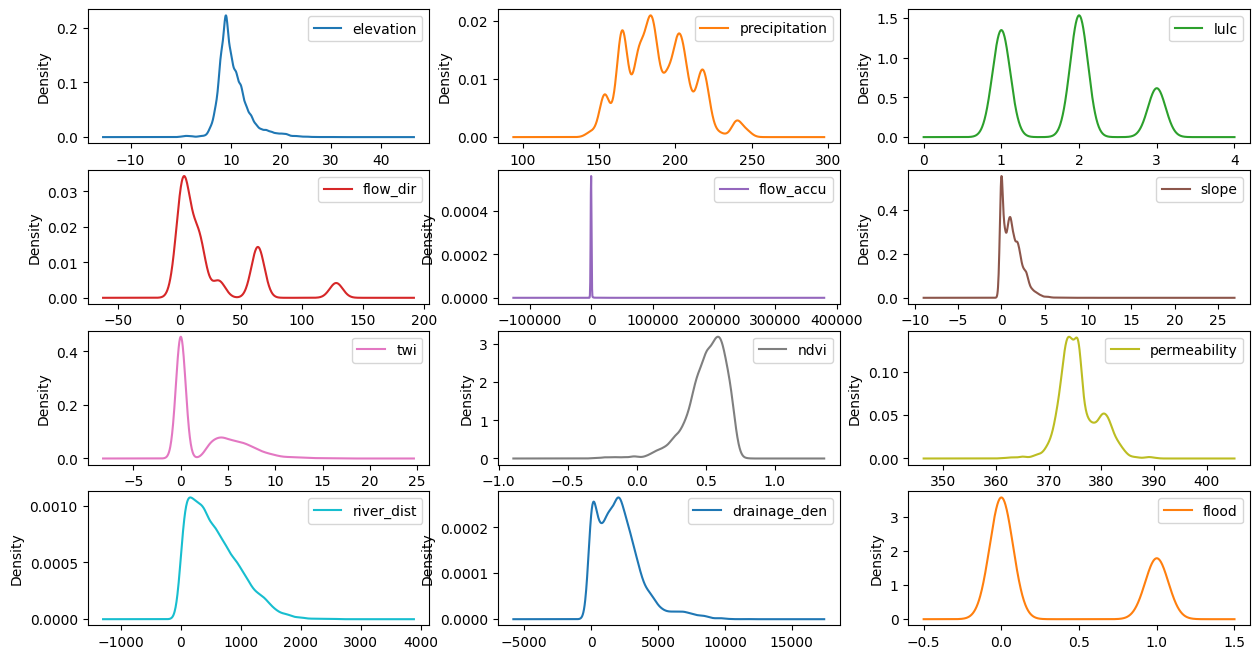

In [720]:
df.plot(kind='density',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

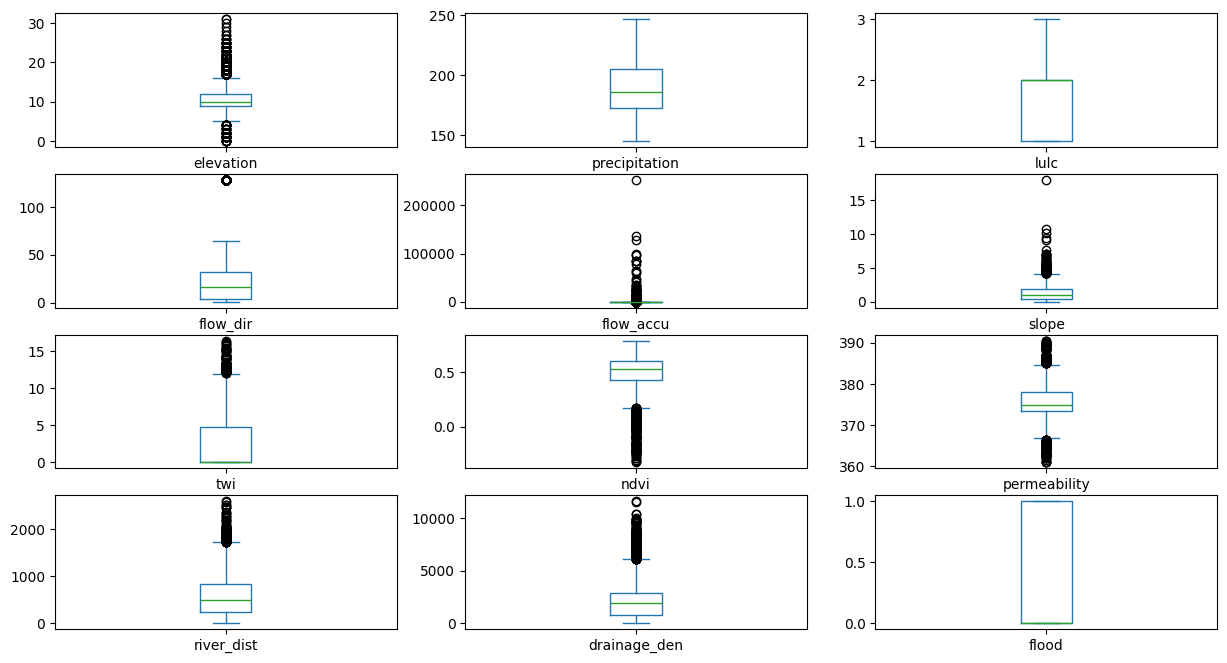

In [721]:
df.plot(kind='box',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

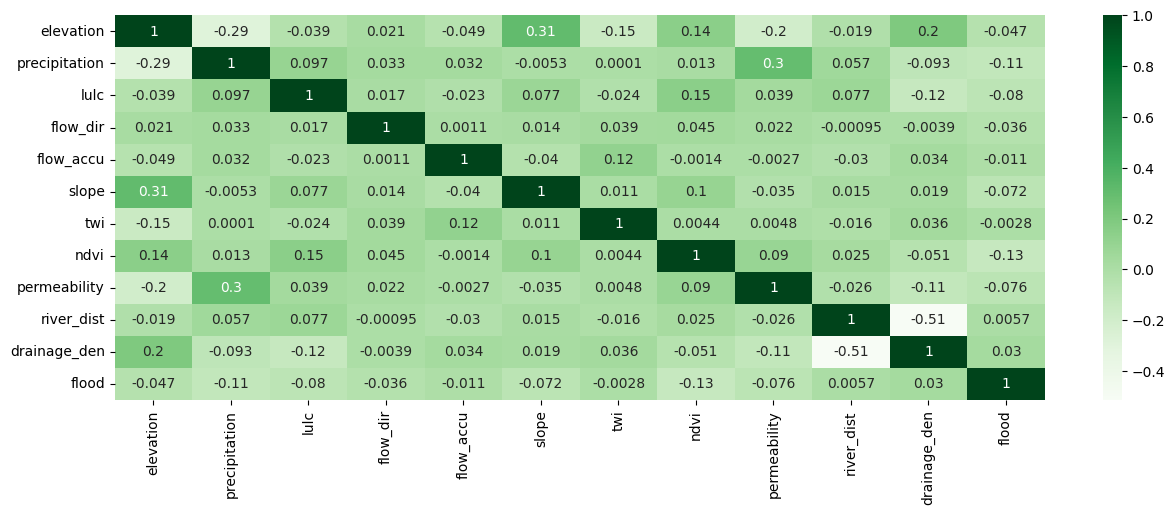

In [722]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [723]:
x = df.drop(columns=['flood'])

In [724]:
y=df['flood']

In [725]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [726]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

In [727]:
smote = SMOTE(random_state=42)
x, y= smote.fit_resample(x, y)

In [728]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [729]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=115, max_depth=30, class_weight="balanced", random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=115,
                       random_state=42)

In [730]:
model.predict(x_test)

array([0., 0., 0., ..., 0., 1., 0.])

In [733]:
model.score(x_train,y_train)

1.0

In [731]:
model.score(x_test,y_test)

0.7891972993248312

In [732]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🎯 ROC-AUC Score:")
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))


📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1367
         1.0       0.80      0.76      0.78      1299

    accuracy                           0.79      2666
   macro avg       0.79      0.79      0.79      2666
weighted avg       0.79      0.79      0.79      2666


📊 Confusion Matrix:
[[1121  246]
 [ 316  983]]

🎯 ROC-AUC Score:
ROC-AUC: 0.8555120617795581
